<a href="https://colab.research.google.com/github/aphipps923/IMSE541/blob/main/Hw_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Lab8Data.csv to Lab8Data.csv
User uploaded file "Lab8Data.csv" with length 293 bytes


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy.special import comb
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pylab

In [4]:
data1 = pd.read_csv('Lab8Data.csv', sep=',', na_values=".")
data1

,Unnamed: 0,x1,x2,x3,x4
0,1,6,9,10,15
1,2,10,4,6,11
2,3,7,8,10,5
3,4,8,9,6,13
4,5,9,10,7,13
5,6,12,11,10,10
6,7,16,10,8,9
7,8,7,5,10,4
8,9,9,7,8,12
9,10,15,16,10,13


In [5]:
dataAll=[data1[['x1', 'x2', 'x3', 'x4']]]

dataAll

[    x1  x2  x3  x4
 0    6   9  10  15
 1   10   4   6  11
 2    7   8  10   5
 3    8   9   6  13
 4    9  10   7  13
 5   12  11  10  10
 6   16  10   8   9
 7    7   5  10   4
 8    9   7   8  12
 9   15  16  10  13
 10   8  12  14  16
 11   6  13   9  11
 12  16   9  13  15
 13   7  13  10  12
 14  11   7  10  16
 15  15  10  11  14
 16   9   8  12  10
 17  15   7  10  11
 18   8   6   8  12
 19  13  14  11  15]

In [6]:
x=np.reshape(dataAll, (20,4))
x

array([[ 6,  9, 10, 15],
       [10,  4,  6, 11],
       [ 7,  8, 10,  5],
       [ 8,  9,  6, 13],
       [ 9, 10,  7, 13],
       [12, 11, 10, 10],
       [16, 10,  8,  9],
       [ 7,  5, 10,  4],
       [ 9,  7,  8, 12],
       [15, 16, 10, 13],
       [ 8, 12, 14, 16],
       [ 6, 13,  9, 11],
       [16,  9, 13, 15],
       [ 7, 13, 10, 12],
       [11,  7, 10, 16],
       [15, 10, 11, 14],
       [ 9,  8, 12, 10],
       [15,  7, 10, 11],
       [ 8,  6,  8, 12],
       [13, 14, 11, 15]])

In [7]:
# Define list variable for groups means
x_bar = []

# Define list variable for groups ranges
r = []


In [8]:
# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
for group in x:
    x_bar.append(group.mean())
    r.append(group.max() - group.min())
#print(x_bar)
#print(r)
m=len(x_bar)
print('points in x, ', m)

points in x,  20


[Text(0, 0.5, 'Range'), Text(0.5, 0, 'Group')]

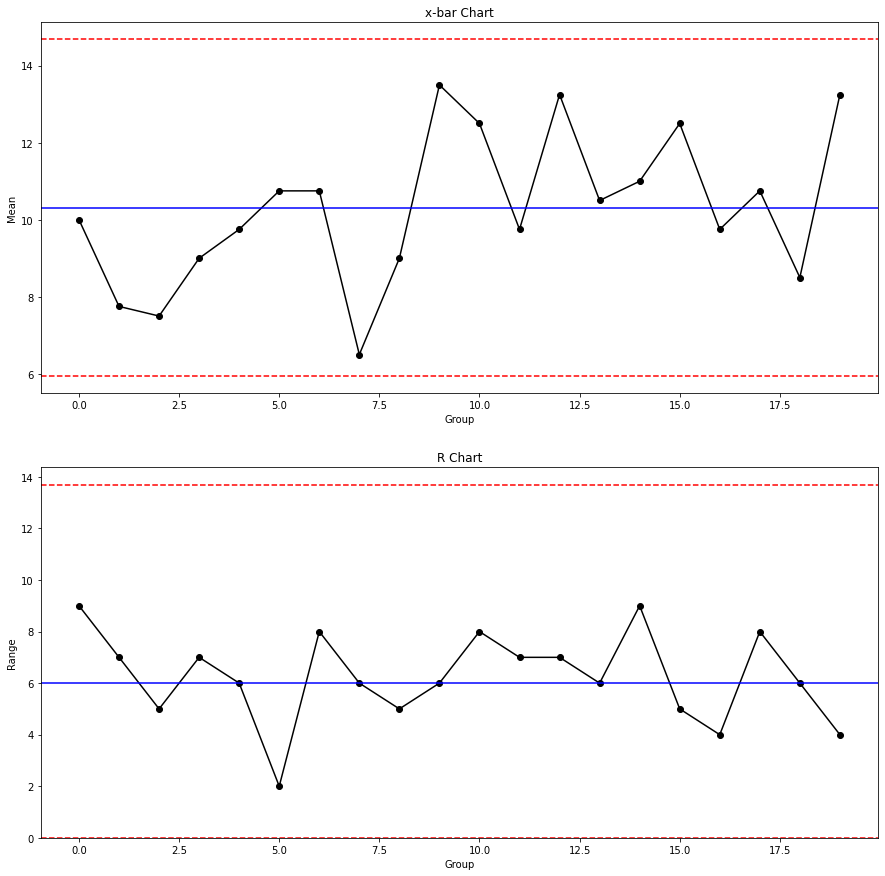

In [9]:
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart

A2=0.729 #n=4
D3=0     #n=4
D4=2.282 #n=4

axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)-A2*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)), color='blue')
axs[0].set_title('x-bar Chart')
axs[0].set(xlabel='Group', ylabel='Mean')

# R chart
axs[1].plot(r, linestyle='-', marker='o', color='black')
axs[1].axhline((D4*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((D3*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(r)), color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('R Chart')
axs[1].set(xlabel='Group', ylabel='Range')

Both the x-bar chart and R chart show the processes are in control as all the points are withing the control limits. 

In [12]:
x_mean = statistics.mean(x_bar)+A2*statistics.mean(r)
x_mean

14.686499999999999

In [13]:
R_mean = statistics.mean(r)
R_mean

6

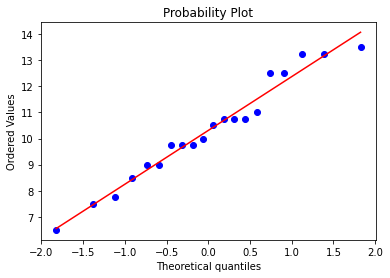

In [46]:
stats.probplot(x_bar,dist = "norm", plot = pylab)
pylab.show()

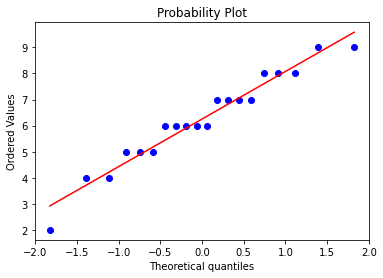

In [47]:
stats.probplot(r,dist = "norm", plot = pylab)
pylab.show()

Both plots pass the fat pencil test, so normality is kept 

[Text(0, 0.5, 'Range'), Text(0.5, 0, 'Group')]

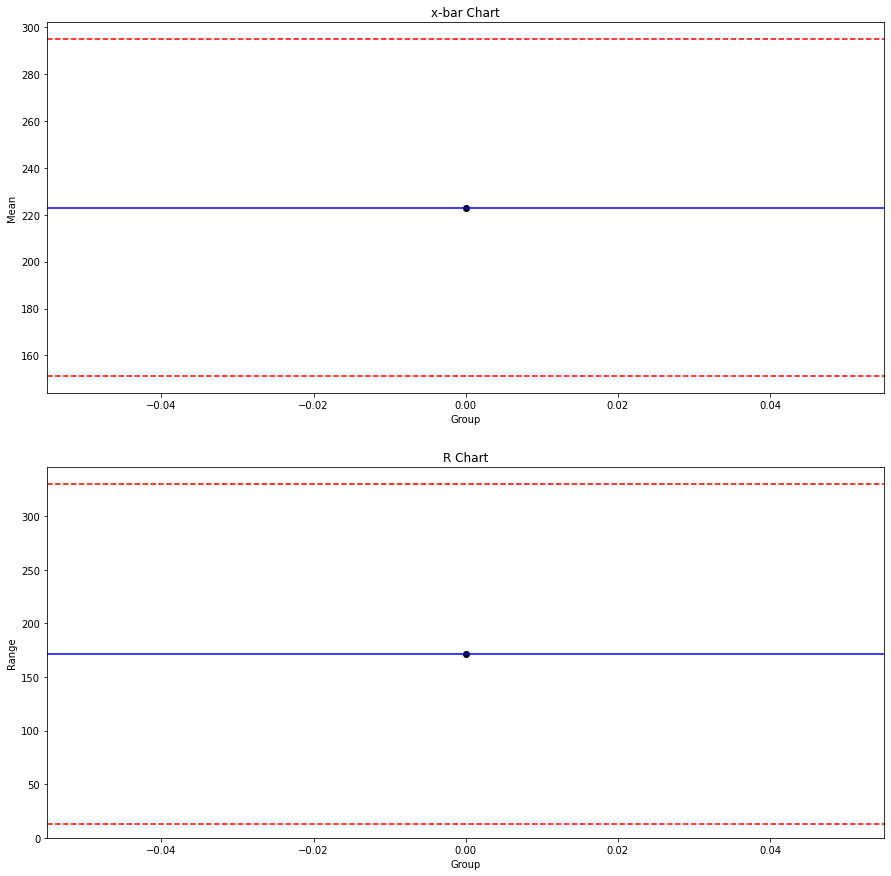

In [15]:
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart

A2=0.419 #n=7
D3=.076     #n=7
D4=1.924 #n=7

axs[0].plot(7805/35, linestyle='-', marker='o', color='black')
axs[0].axhline(((7805/35)+A2*(1200/7)), color='red', linestyle='dashed')
axs[0].axhline(((7805/35)-A2*(1200/7)), color='red', linestyle='dashed')
axs[0].axhline(((7805/35)), color='blue')
axs[0].set_title('x-bar Chart')
axs[0].set(xlabel='Group', ylabel='Mean')

# R chart
axs[1].plot(1200/7, linestyle='-', marker='o', color='black')
axs[1].axhline((D4*(1200/7)), color='red', linestyle='dashed')
axs[1].axhline((D3*(1200/7)), color='red', linestyle='dashed')
axs[1].axhline(((1200/7)), color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('R Chart')
axs[1].set(xlabel='Group', ylabel='Range')